In [74]:
num_date = n_date['num'].to_numpy().repeat(2)
num_active = df[['users', 'date','hour']].groupby(['users','hour']).count()
num_active = num_active.reindex(pd.MultiIndex.from_product([n_date.index,np.arange(48)]), fill_value = 0)
num_active = num_active.unstack(level = 1)

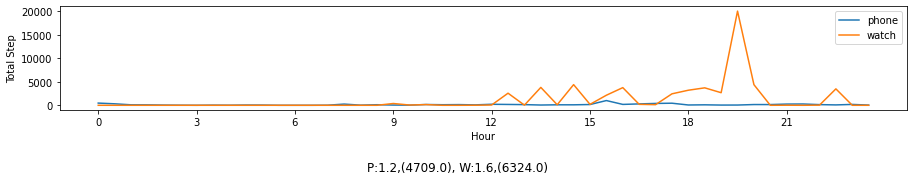

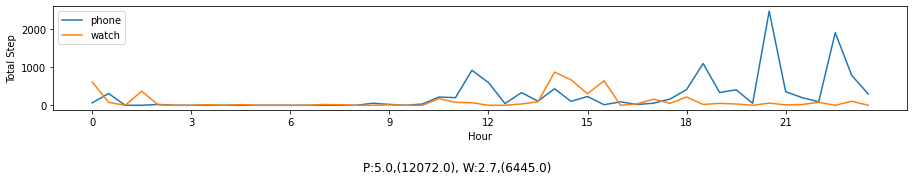

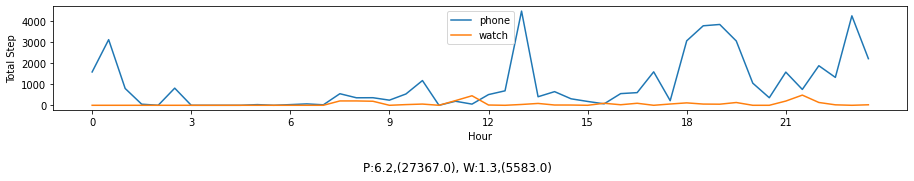

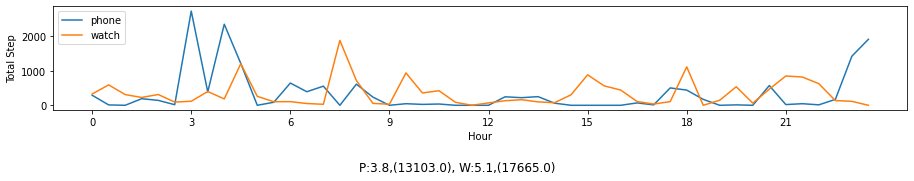

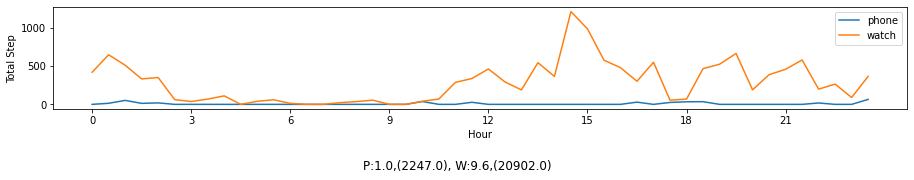

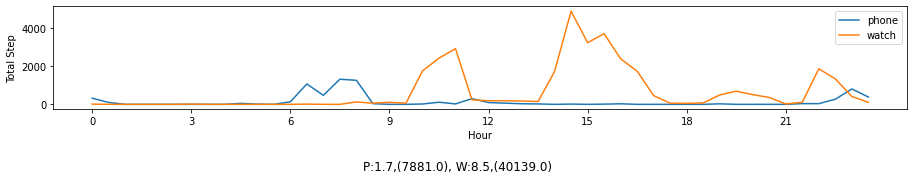

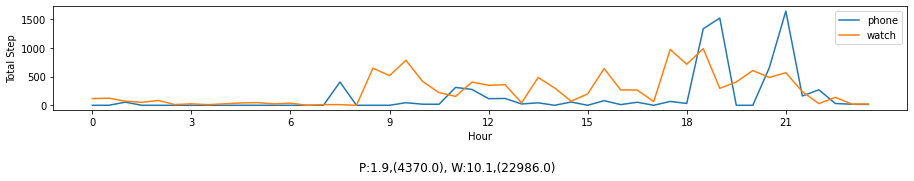

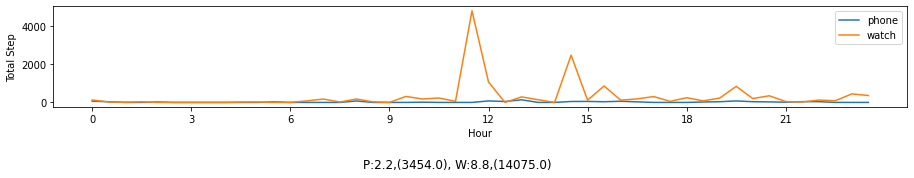

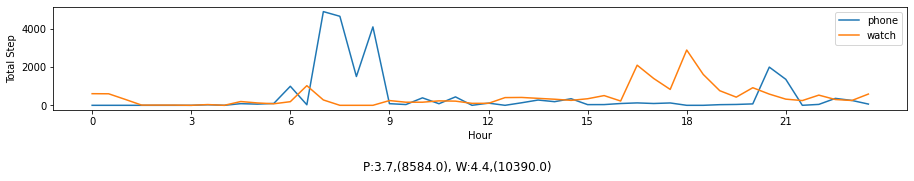

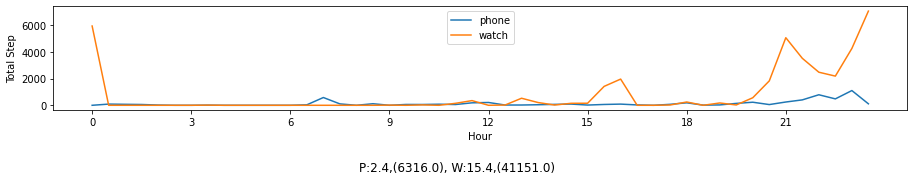

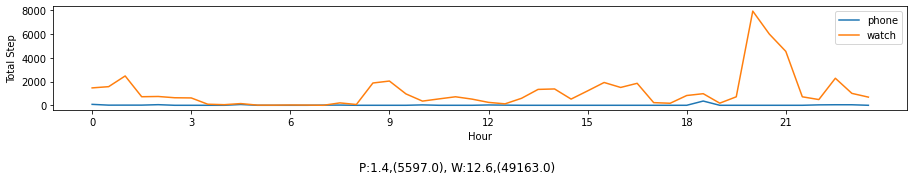

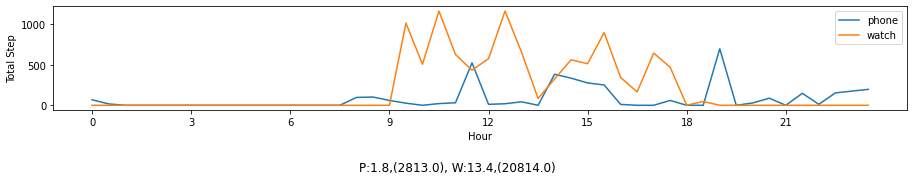

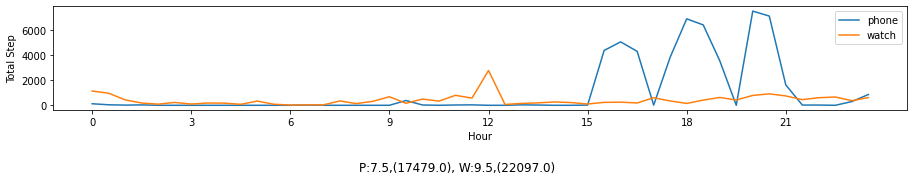

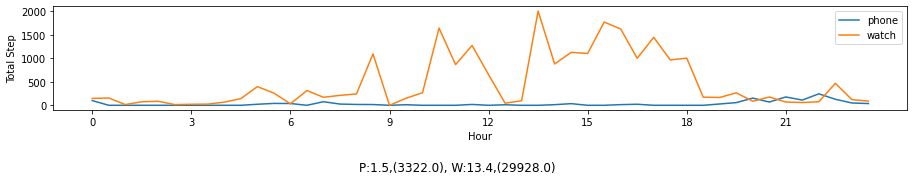

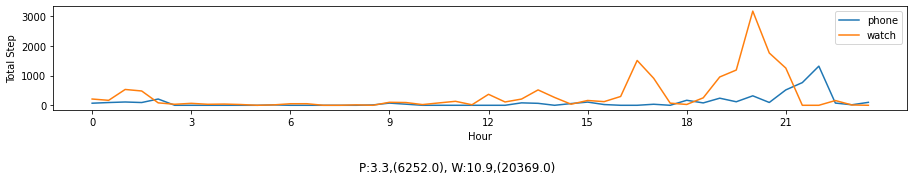

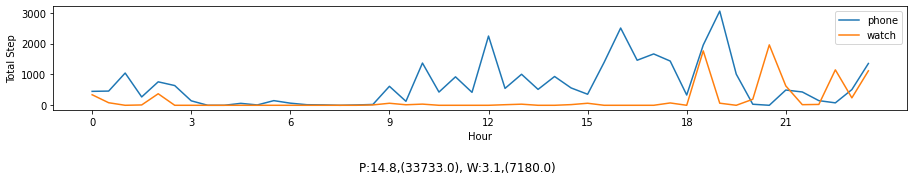

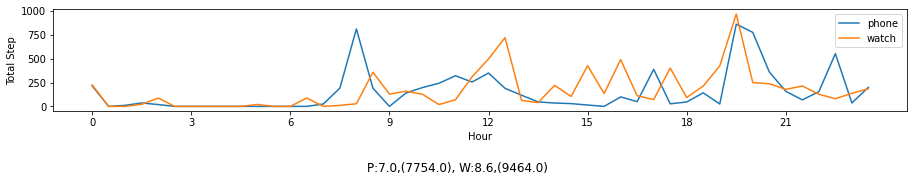

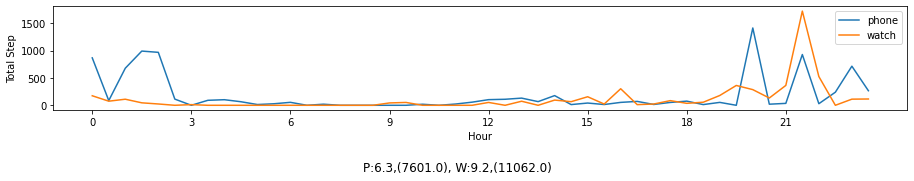

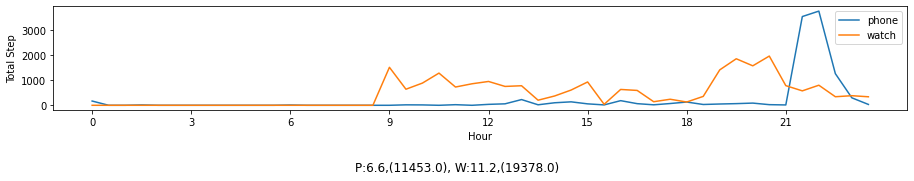

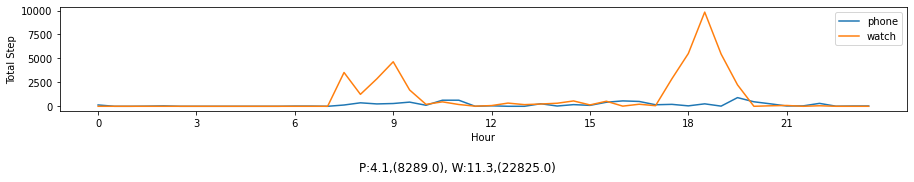

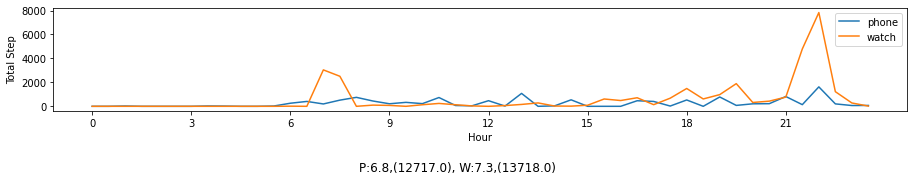

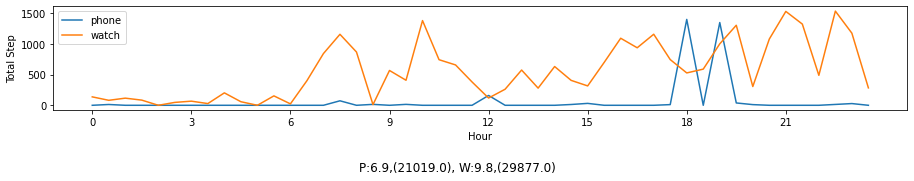

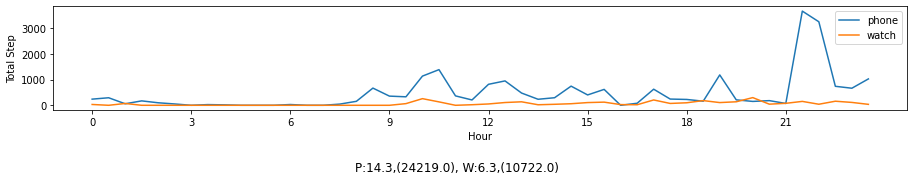

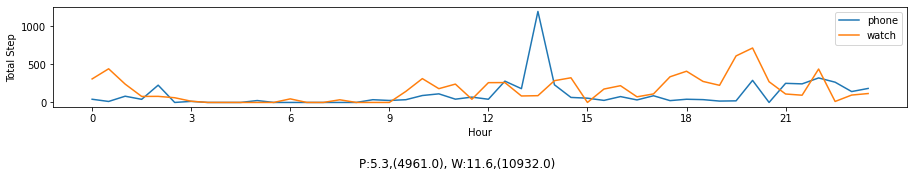

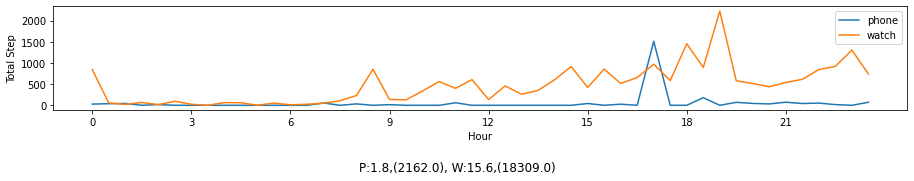

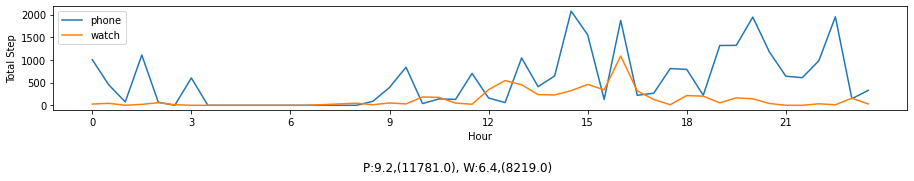

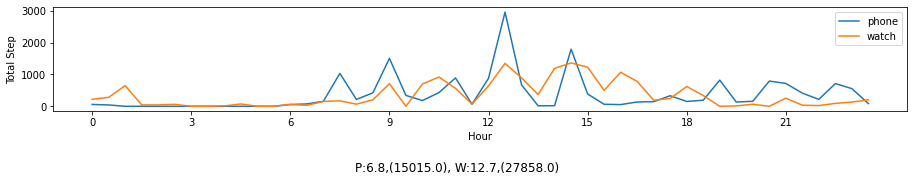

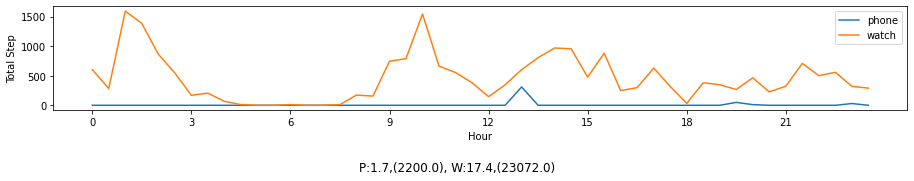

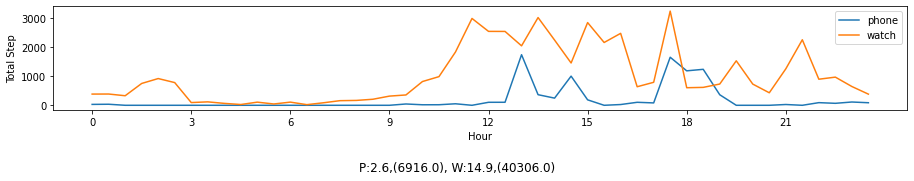

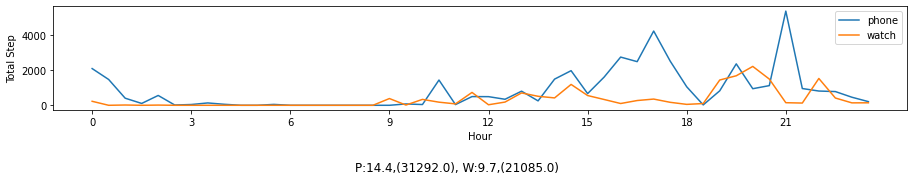

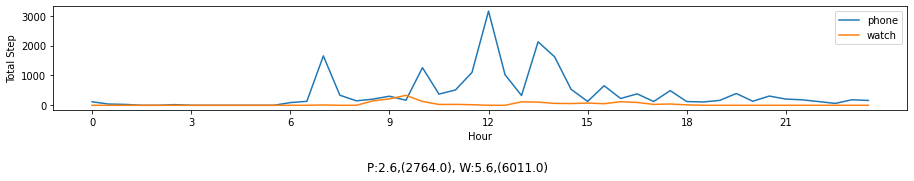

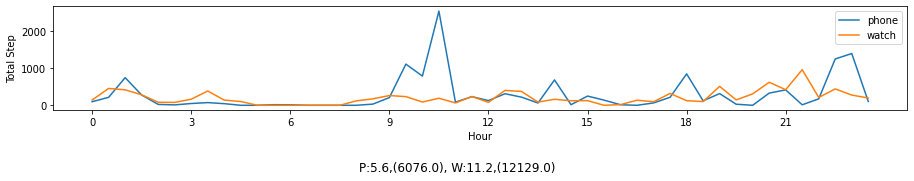

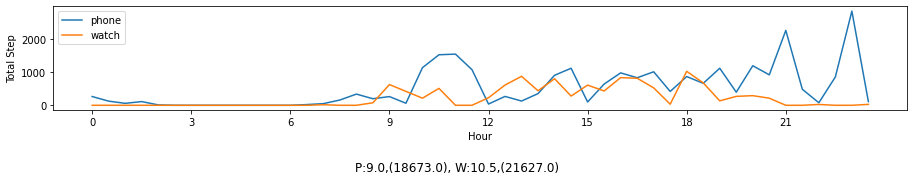

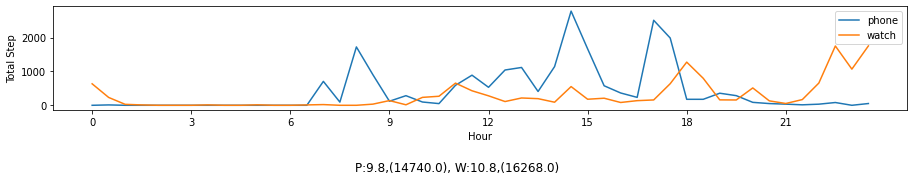

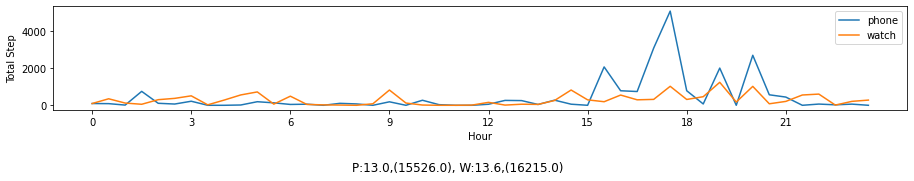

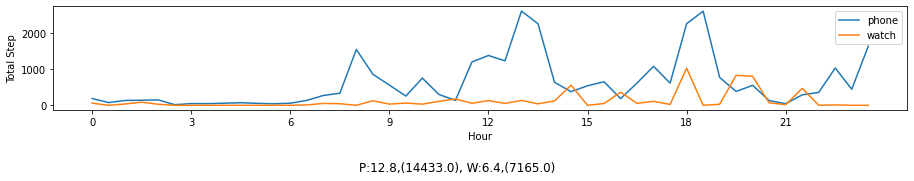

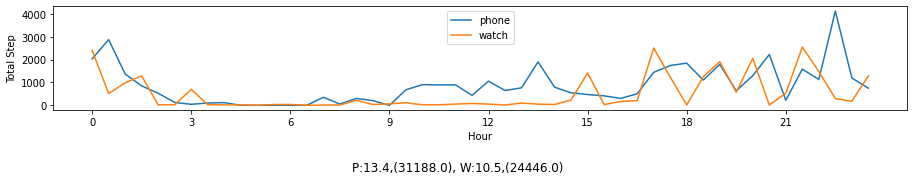

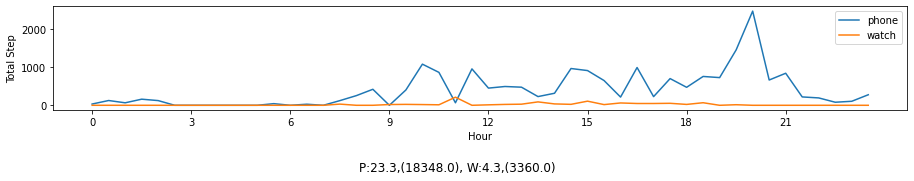

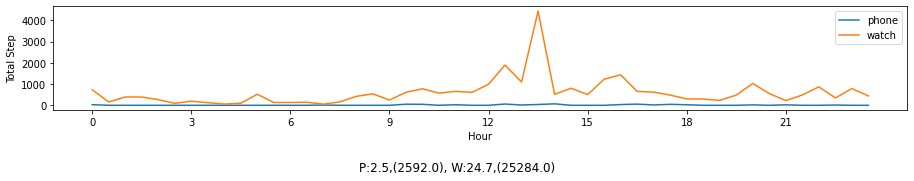

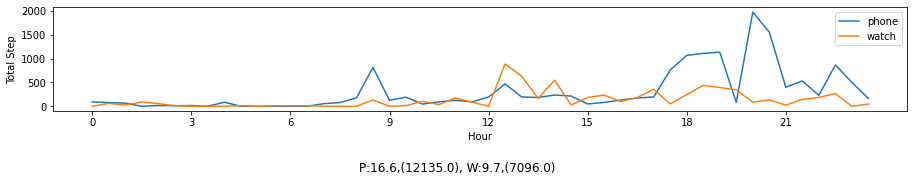

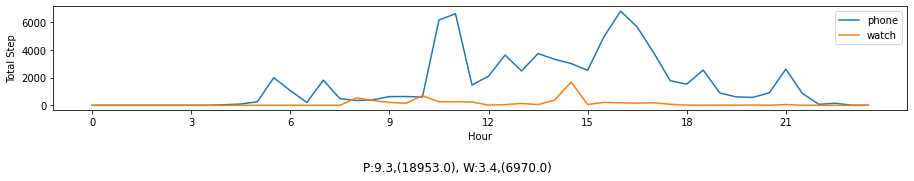

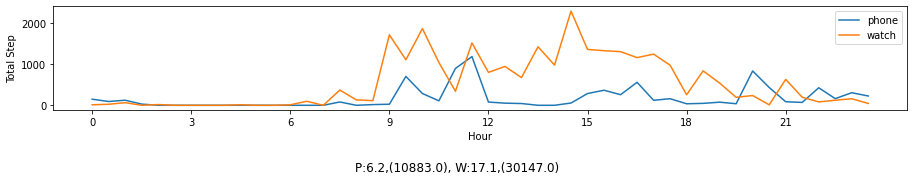

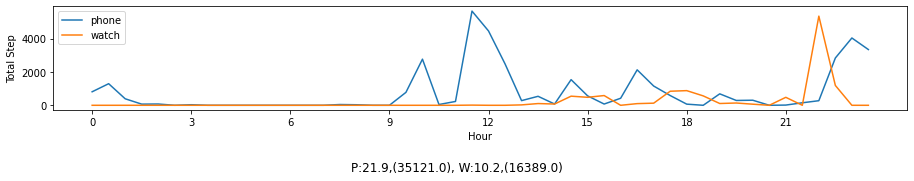

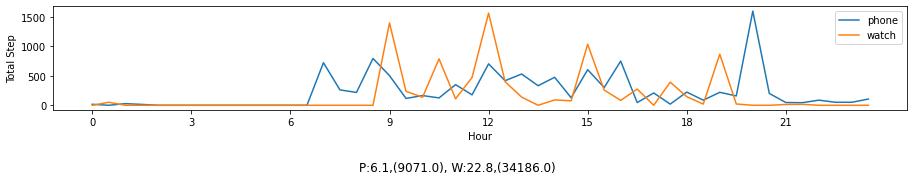

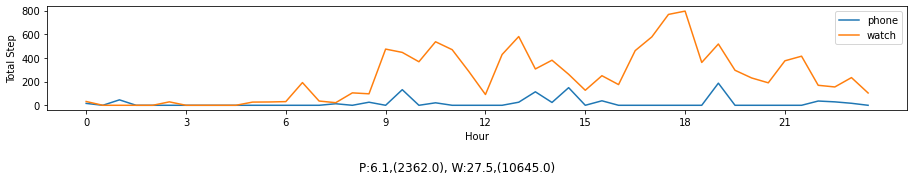

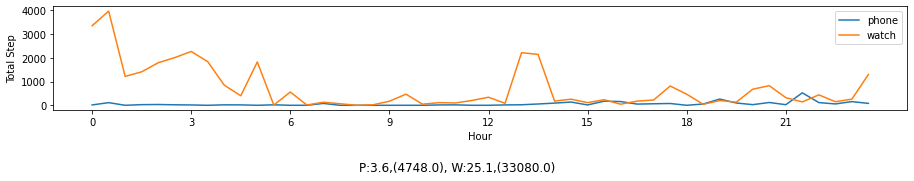

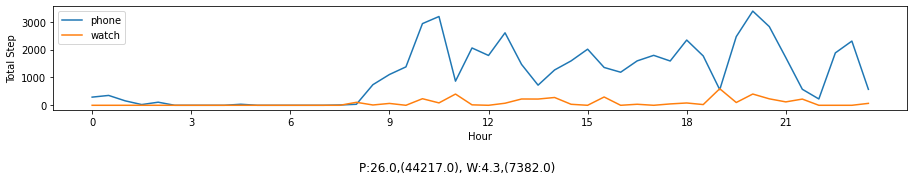

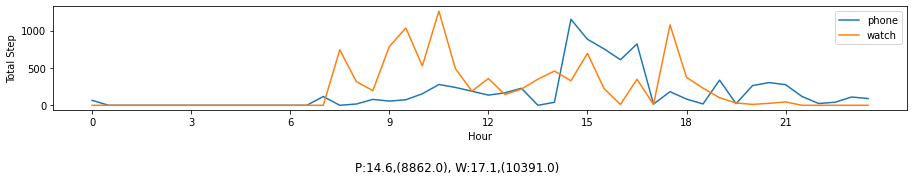

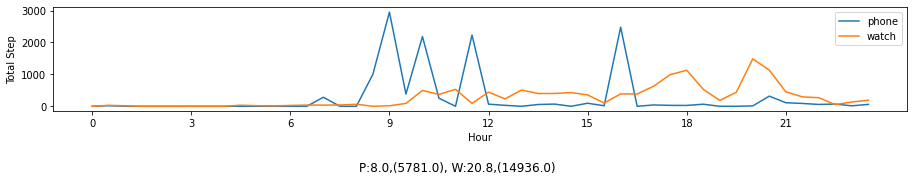

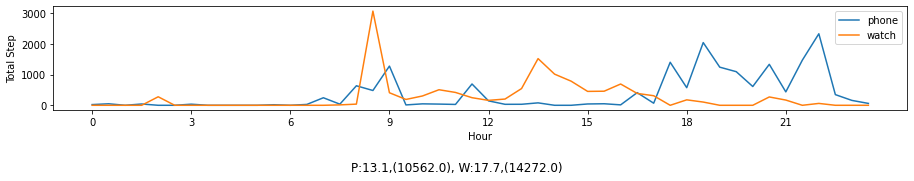

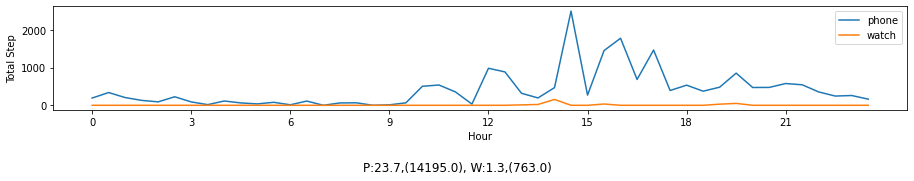

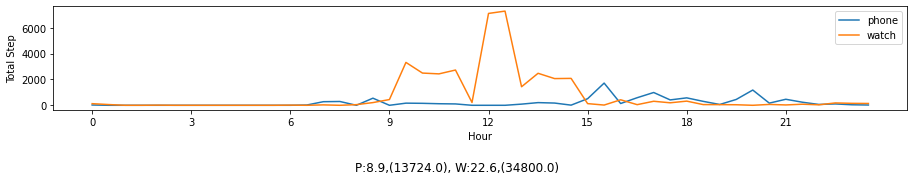

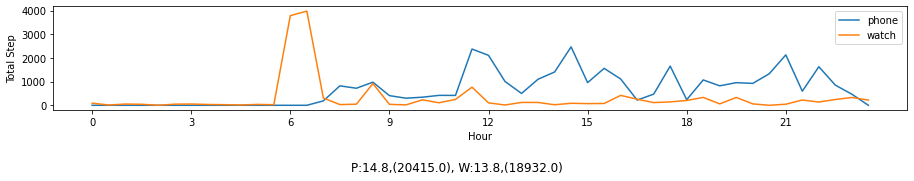

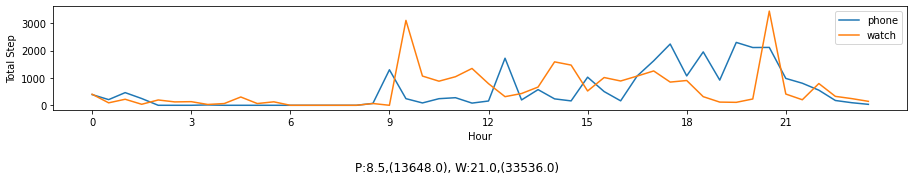

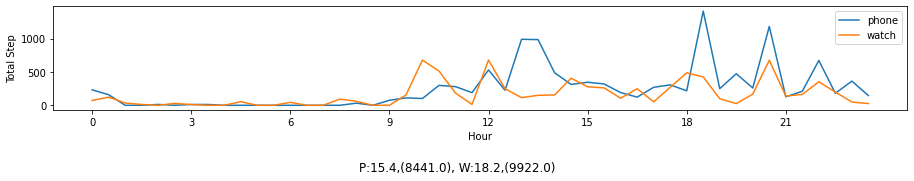

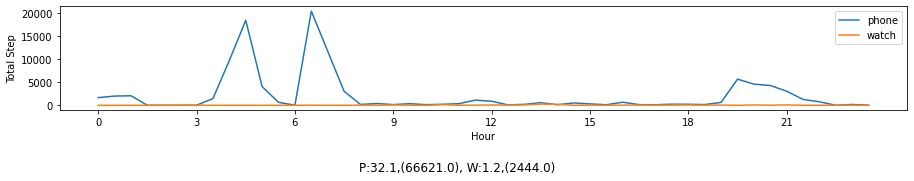

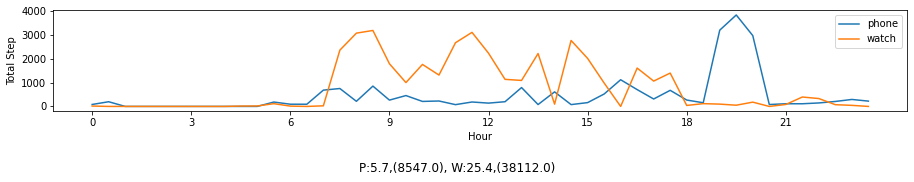

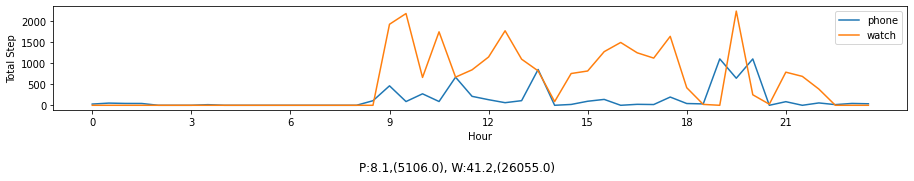

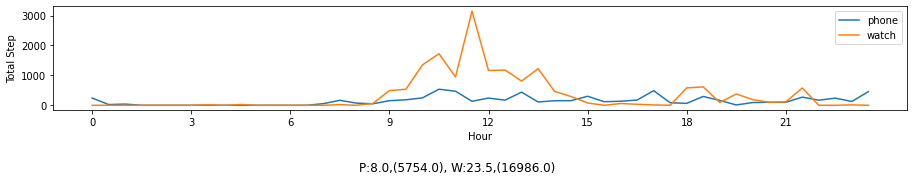

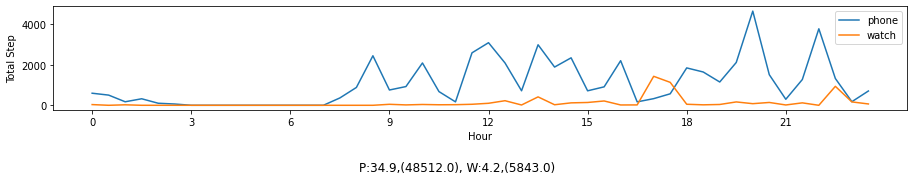

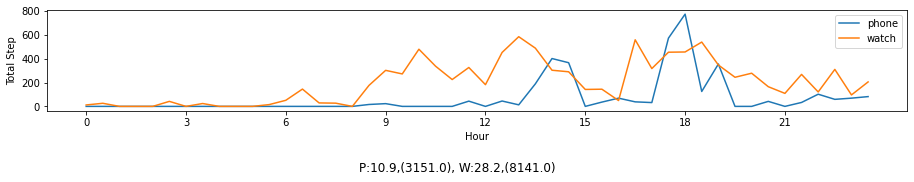

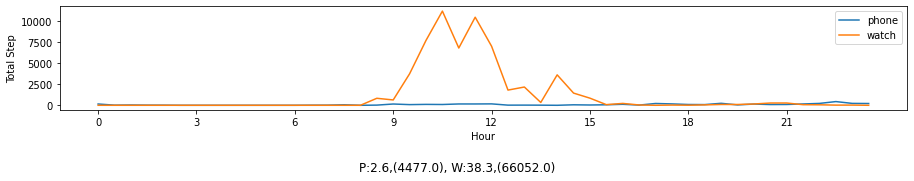

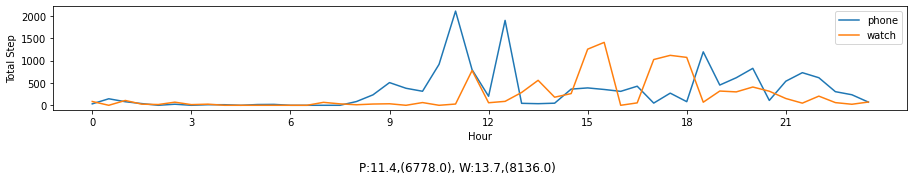

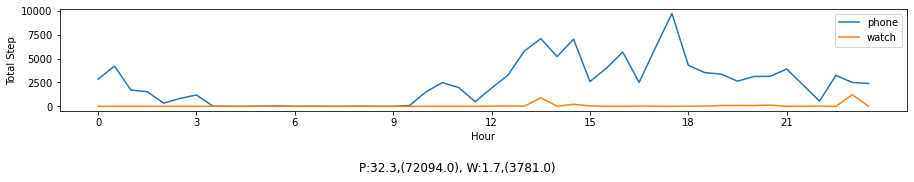

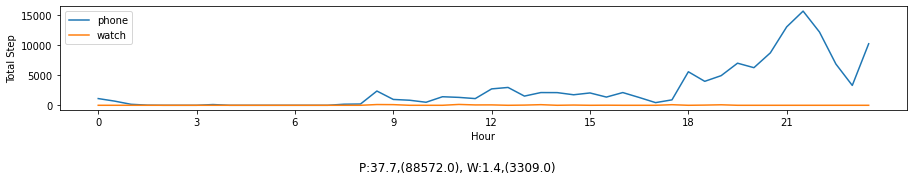

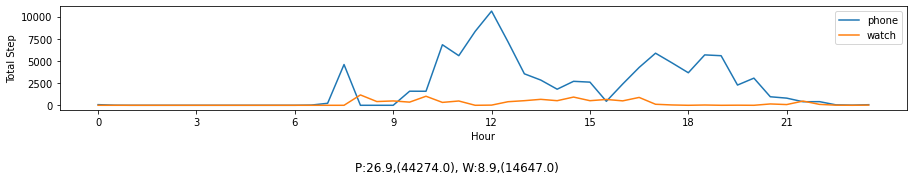

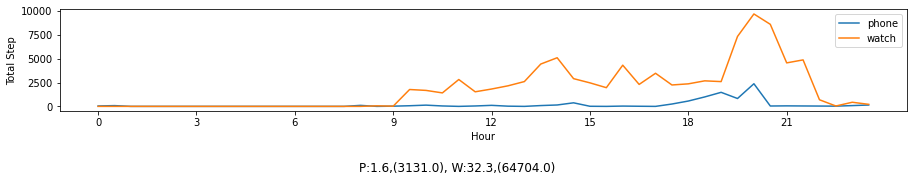

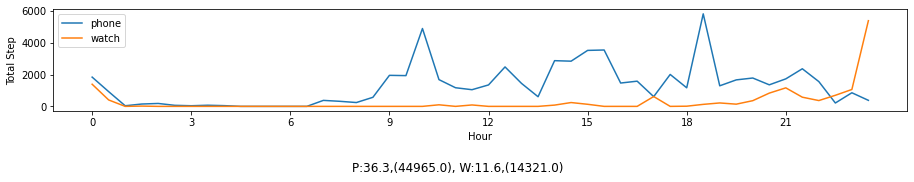

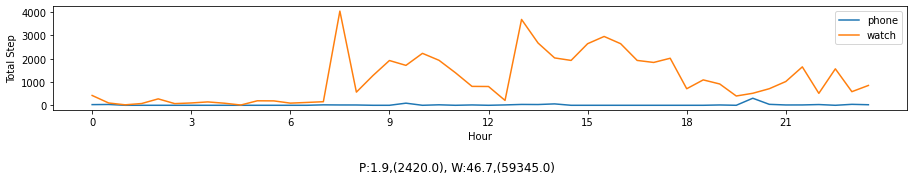

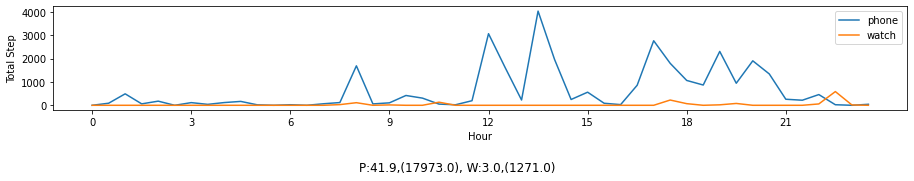

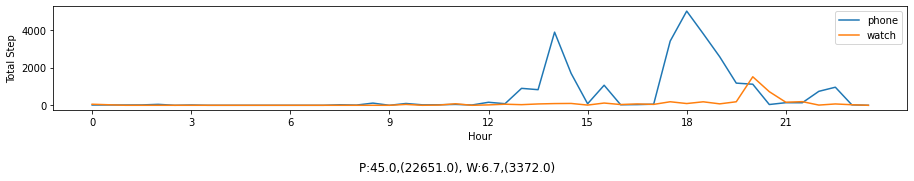

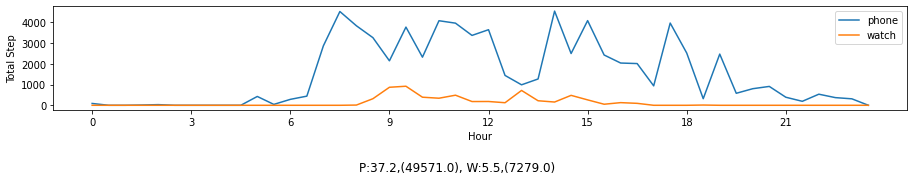

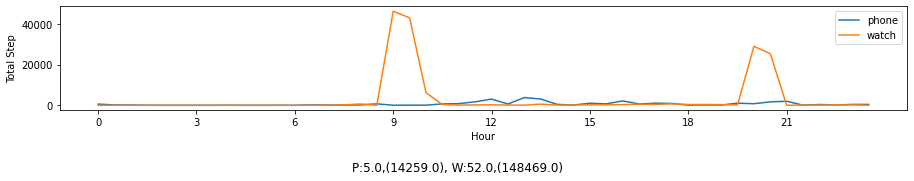

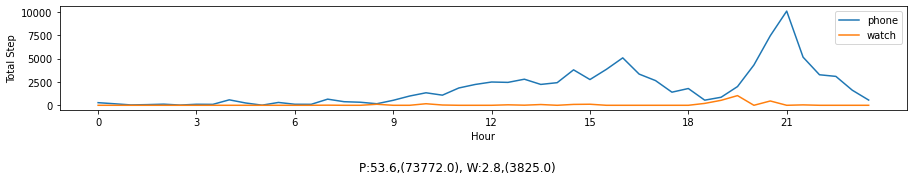

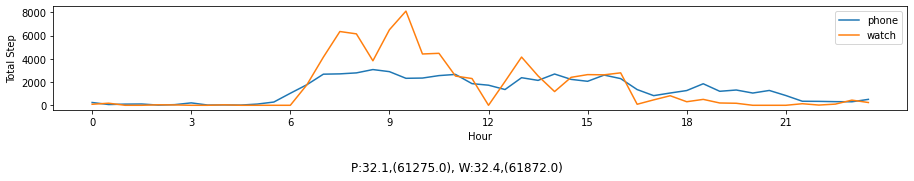

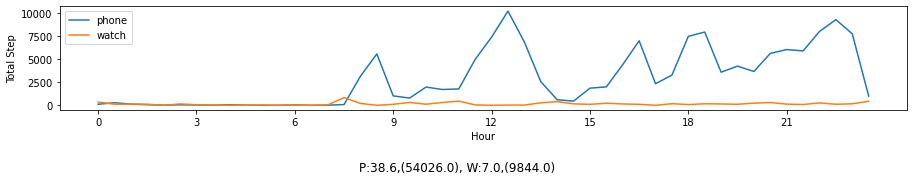

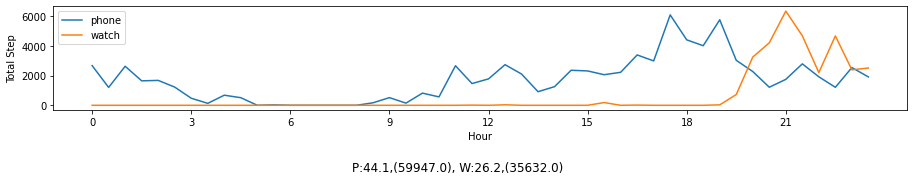

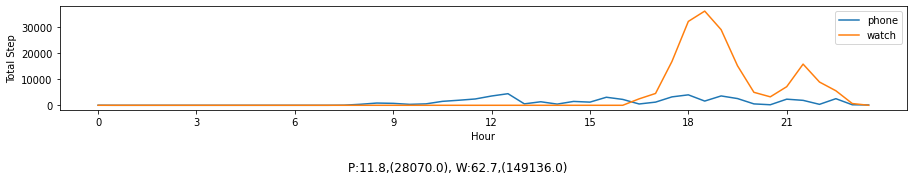

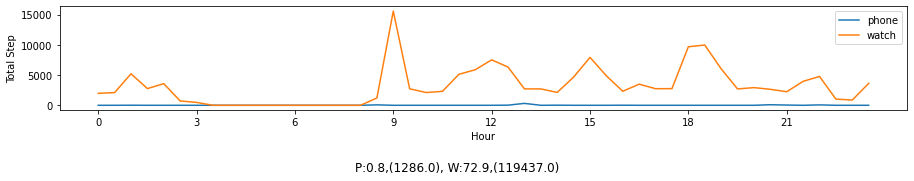

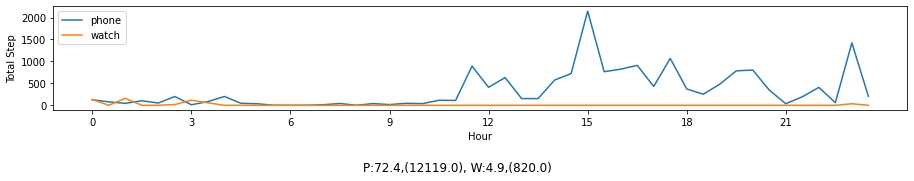

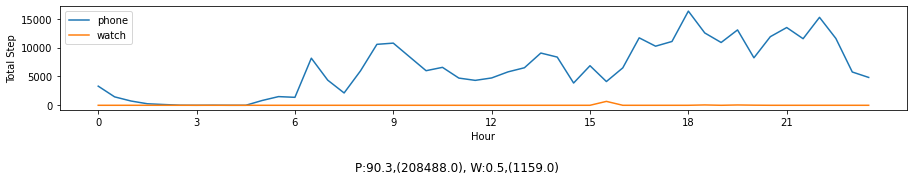

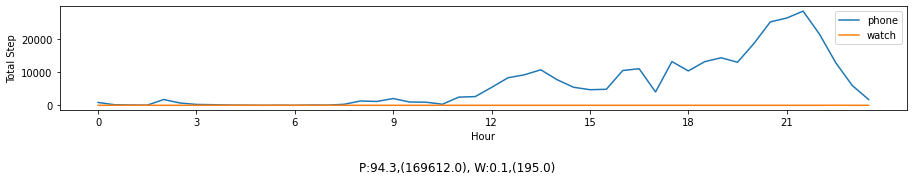

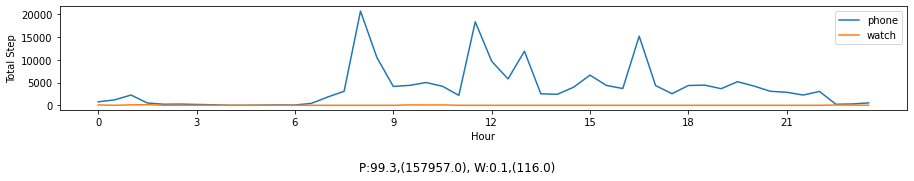

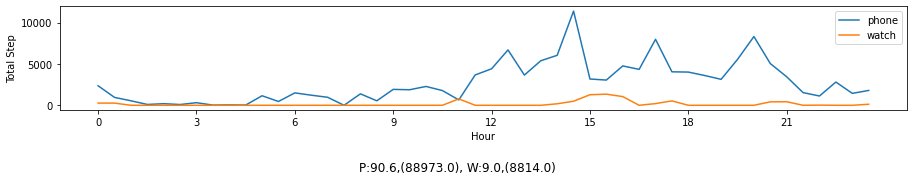

In [178]:
statement = "sum >10 and (ratio >= .9 or ratio <= -.9)"
min_count = df.query(statement)[['users','hour','oriented','sum']].groupby(['users','hour','oriented']).count()
min_count = min_count.unstack(level = 1, fill_value = 0)
min_count = min_count.reindex(pd.MultiIndex.from_product([n_date.index,['p','w']]), fill_value = 0)

max_count = min_count + num_date.reshape(-1,1).repeat(48,axis = 1) - num_active.to_numpy().repeat(2, axis = 0)

min_count = min_count.apply(lambda x: x/num_date)
max_count = max_count.apply(lambda x: x/num_date)

diff_step = df.query(statement)[['users','hour','oriented','sum']].groupby(['users','hour','oriented']).sum()
diff_step = diff_step.unstack(level = 1, fill_value = 0)
diff_step = diff_step.reindex(pd.MultiIndex.from_product([n_date.index,['p','w']]), fill_value = 0)

# diff_step = diff_step.apply(lambda x: x/num_date)

def moving_average(x, w = 5):
    return np.convolve(x, np.ones(w), 'valid') / w

nrows = len(users)
for idx in range(nrows):
    user = users[idx]
    min_user_p = min_count.loc[user].loc['p']
    max_user_p = max_count.loc[user].loc['p']
    
    min_user_w = min_count.loc[user].loc['w']
    max_user_w = max_count.loc[user].loc['w']
    
    diff_step_p = diff_step.loc[user].loc['p']
    diff_step_w = diff_step.loc[user].loc['w']
    
    fig, ax = plt.subplots(1, 1, figsize = (6.4*2, 2.5))

    # ax.fill_between(np.arange(48), min_user_p, max_user_p ,label="phone", color = color['phone'], alpha = 0.5)
    # ax.fill_between(np.arange(48), min_user_w, max_user_w ,label="watch", color = color['watch'], alpha = 0.5)
    # ax.plot(np.arange(48), min_user_w, label="watch", color = color['watch'])

    ax.plot(np.arange(48), diff_step_p, label="phone", color = color['phone'])
    ax.plot(np.arange(48), diff_step_w, label="watch", color = color['watch'])
    ax.set_xlabel("Hour")
    ax.set_ylabel("Total Step")
    ax.legend()
    # ax.set_ylim([0,1])
    # ax.set_ylim([0,8000])
    ax.set_xticks(np.arange(0,48,6))
    ax.set_xticklabels(np.arange(0,24,3))
    fig.supxlabel(f'''P:{round(ratio.loc[user]['p']*100,1)},({cnt.loc[user]['p']}), W:{round(ratio.loc[user]['w']*100,1)},({cnt.loc[user]['w']})''')
    plt.tight_layout()
    plt.show()
    plt.close()

In [118]:
count_list = np.zeros(4)
# index = range(36,48)
index = range(12, 36)
threshold = 0.25 * len(list(index))
for user in users:
    min_user_p = min_count.loc[user].loc['p']
    min_user_w = min_count.loc[user].loc['w']
    idx = 0
    if min_user_p[index].sum() > threshold:
        idx += 2
    if min_user_w[index].sum() > threshold:
        idx += 1
    count_list[idx] += 1
print("none","watch","phone","both")
print("day",count_list) #37, 23, 21, 3
# print("night",count_list) #20, 27, 36, 1



none watch phone both
night [72.  5.  7.  0.]


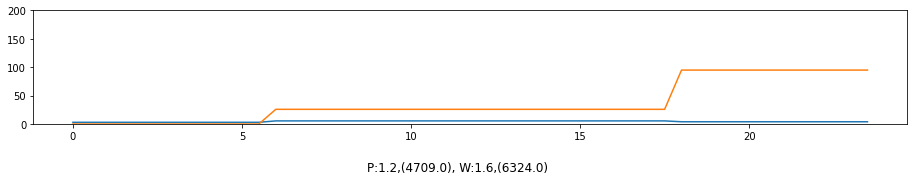

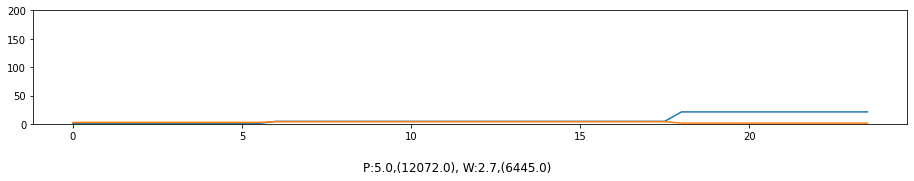

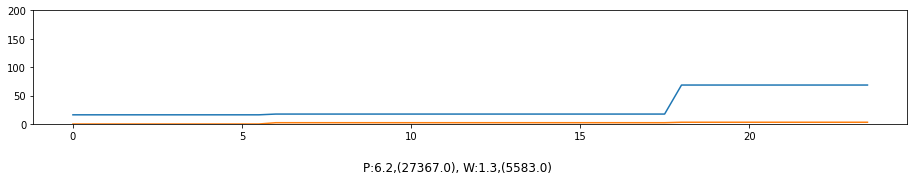

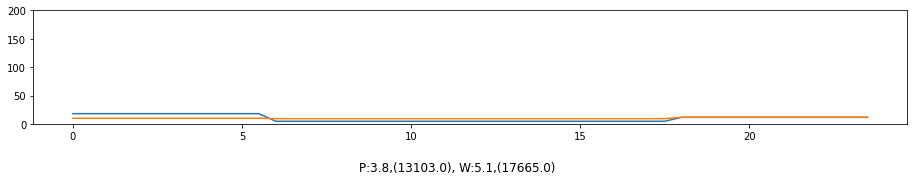

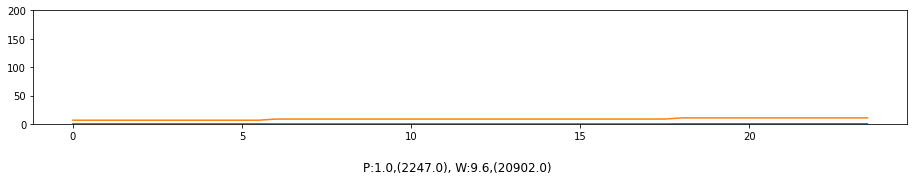

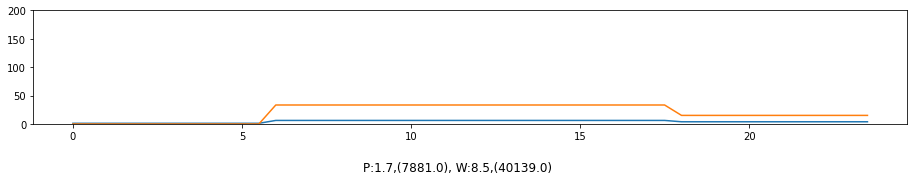

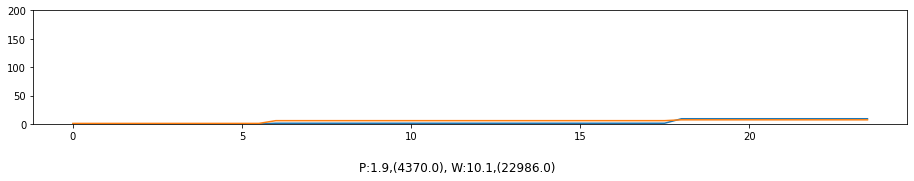

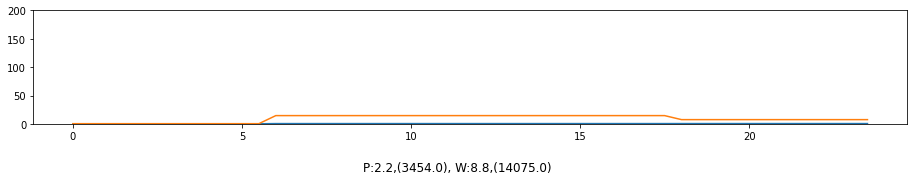

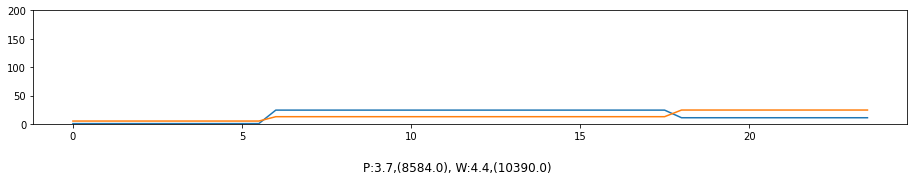

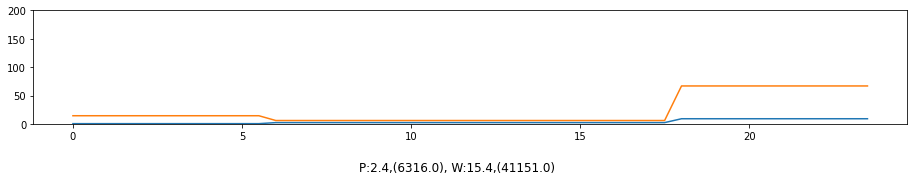

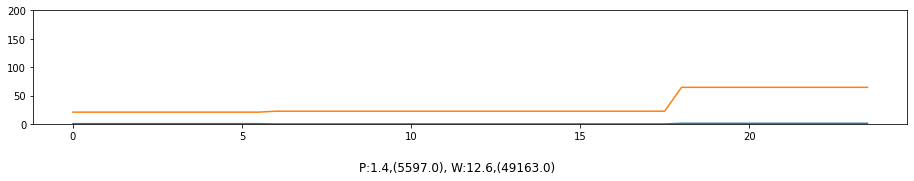

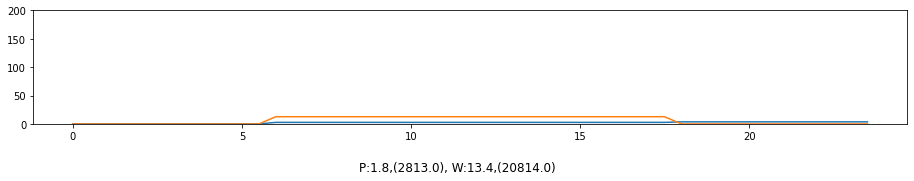

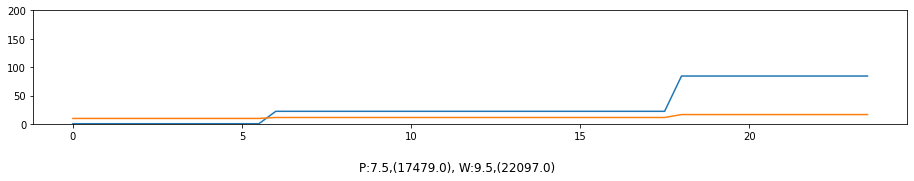

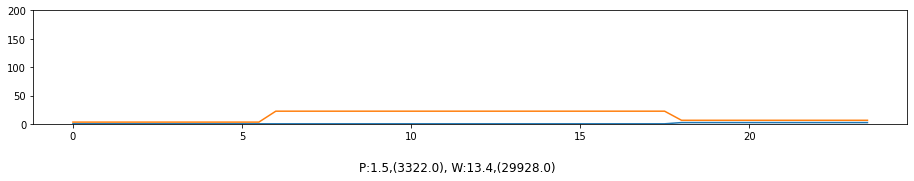

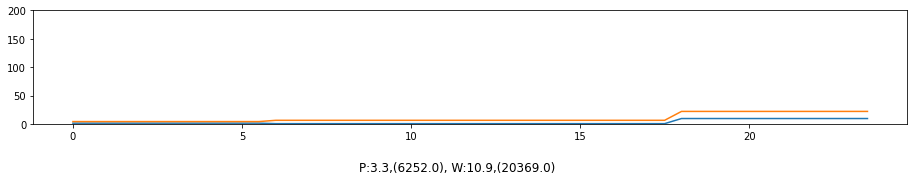

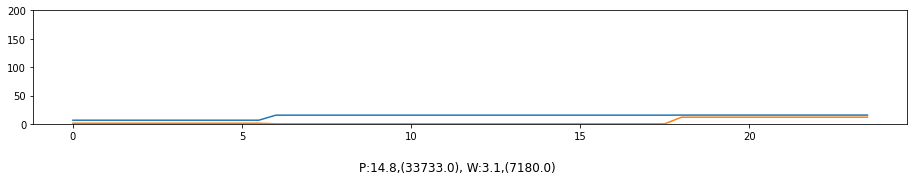

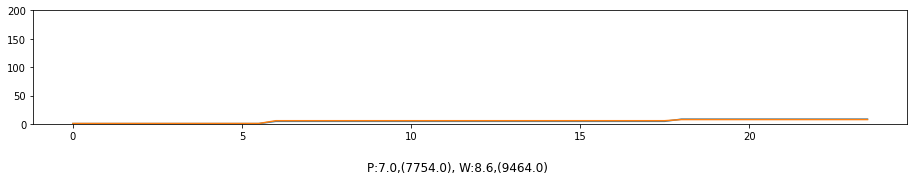

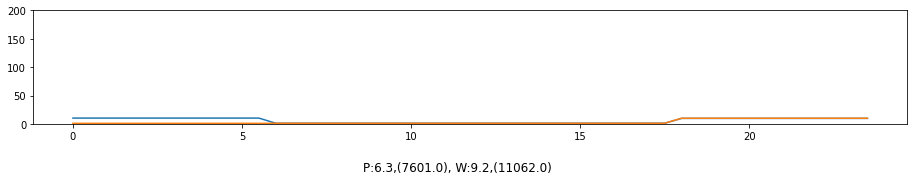

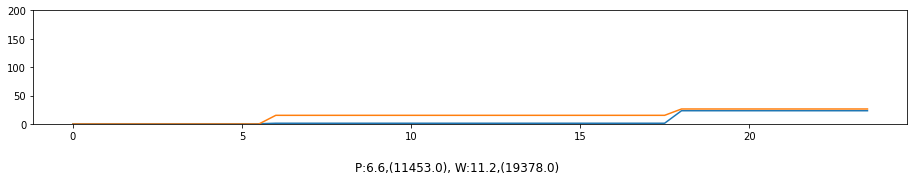

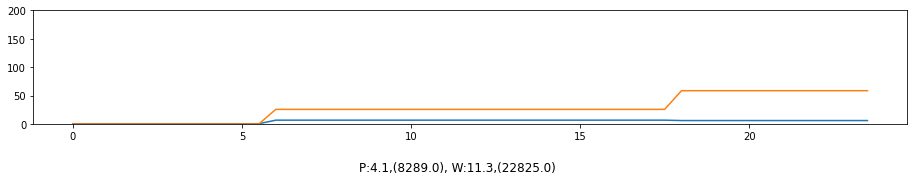

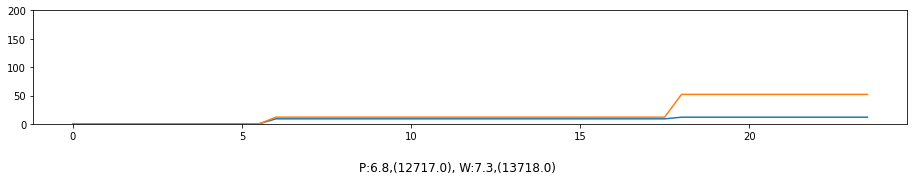

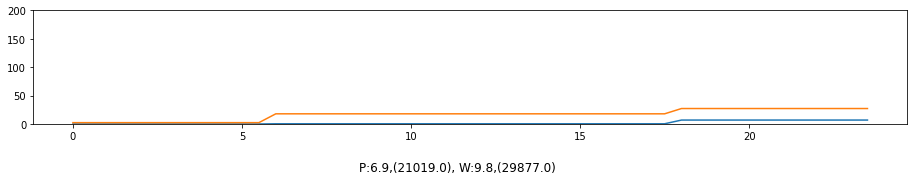

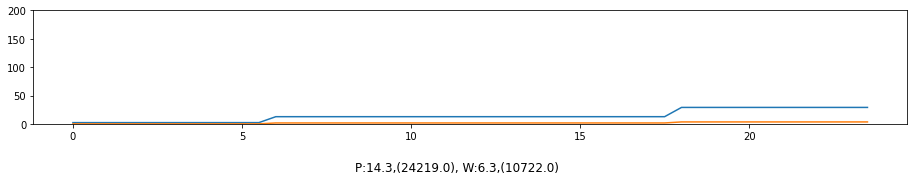

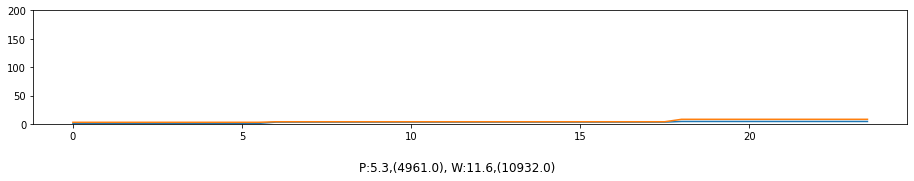

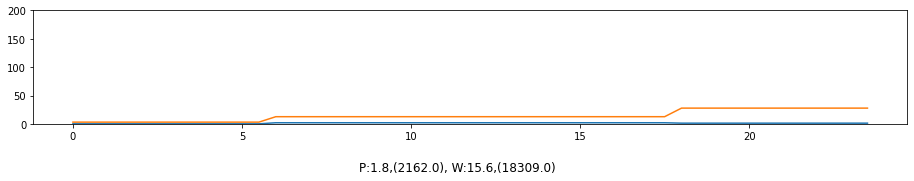

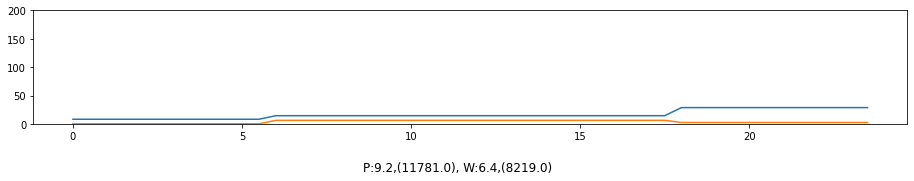

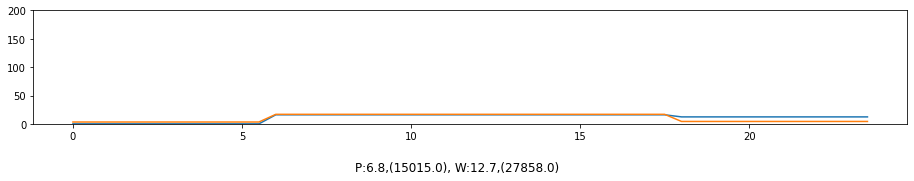

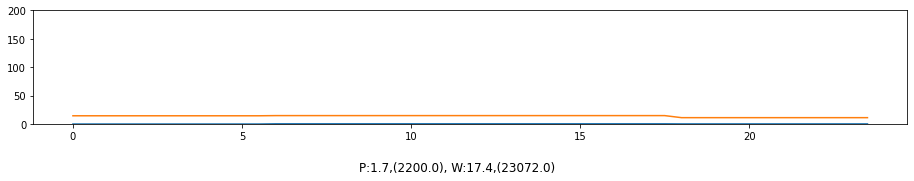

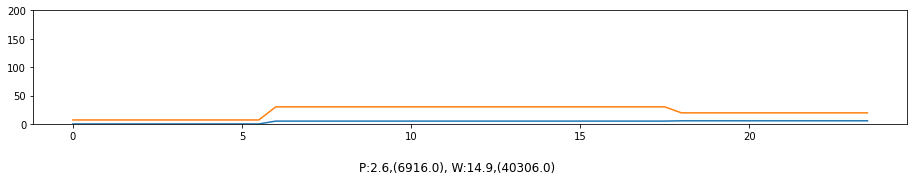

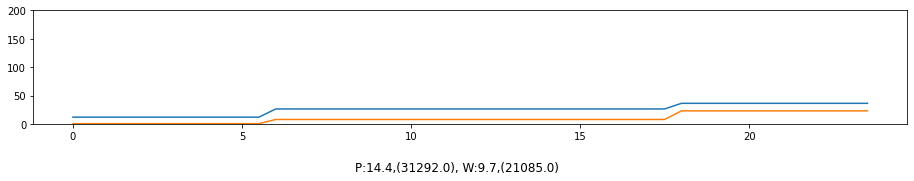

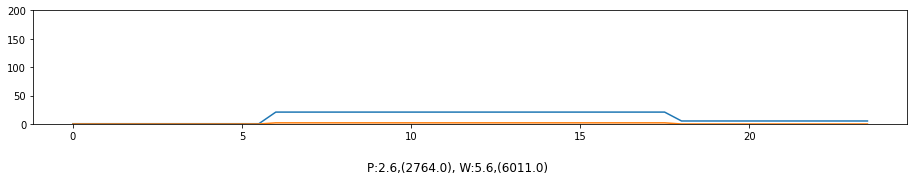

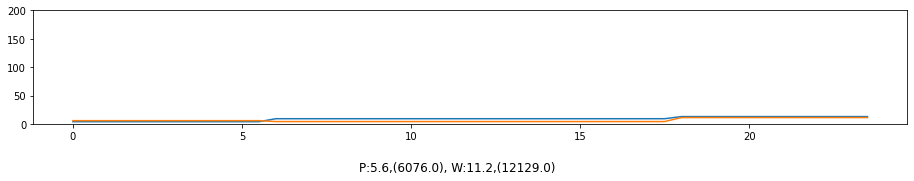

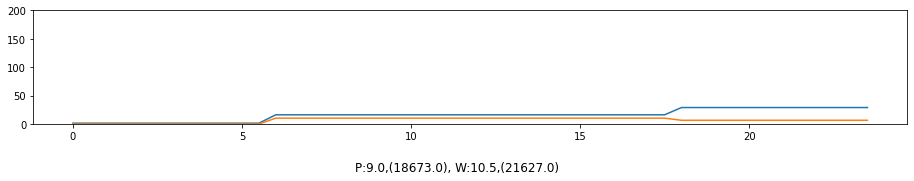

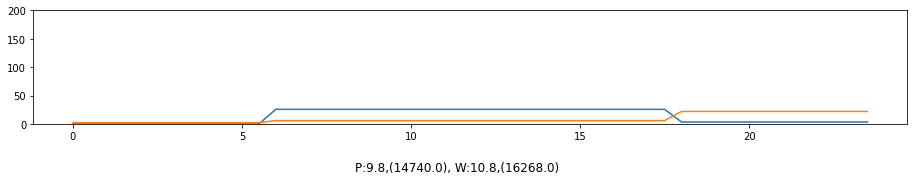

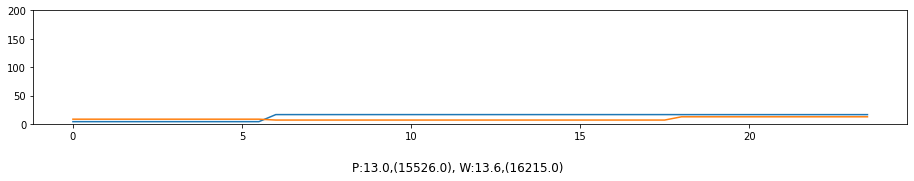

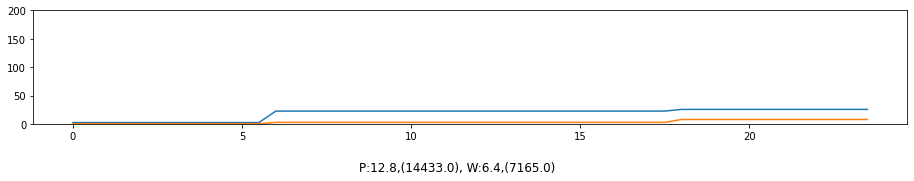

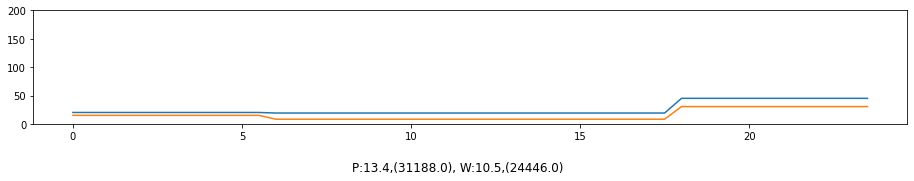

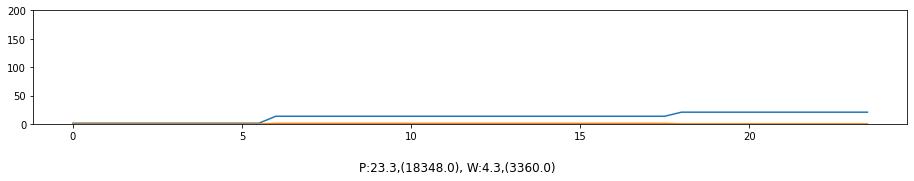

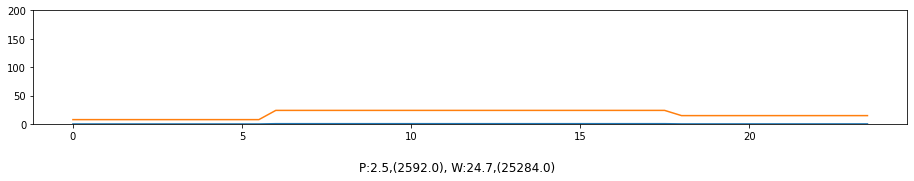

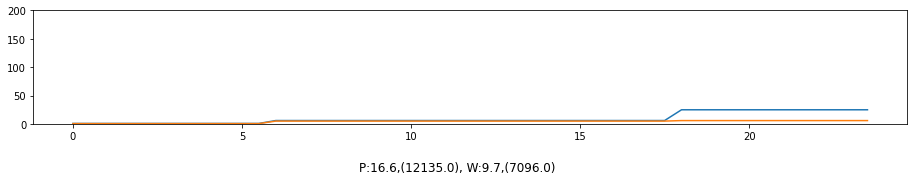

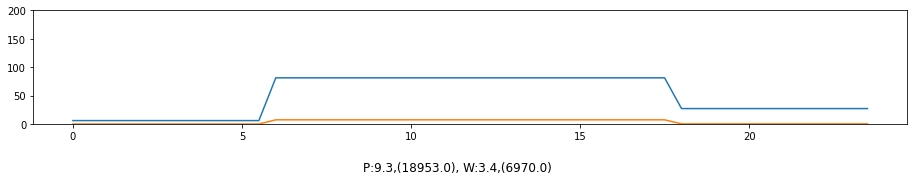

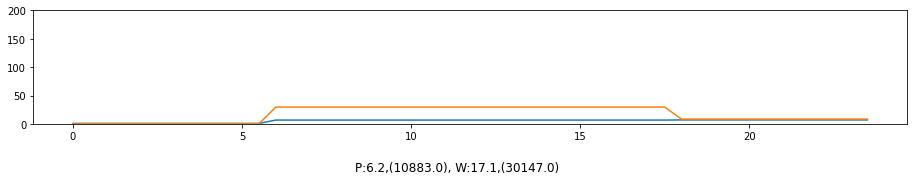

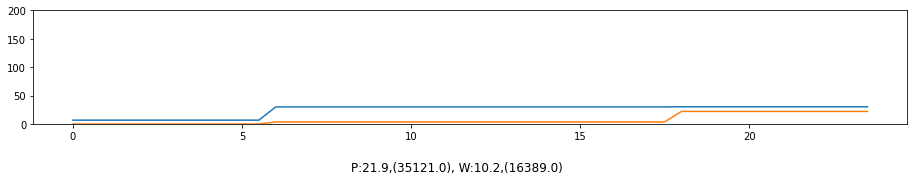

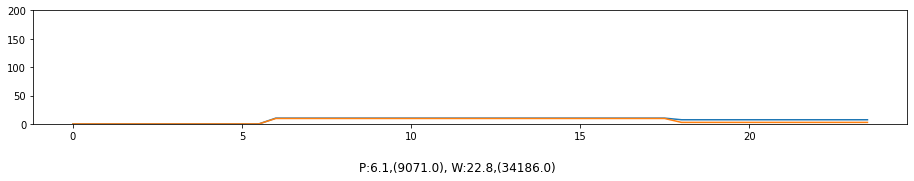

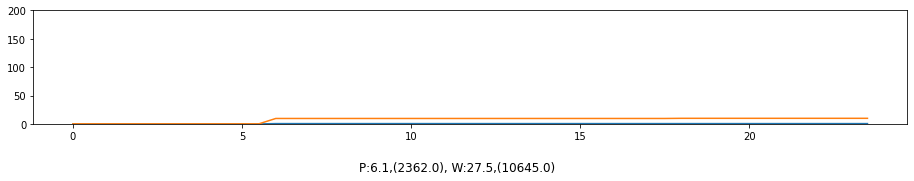

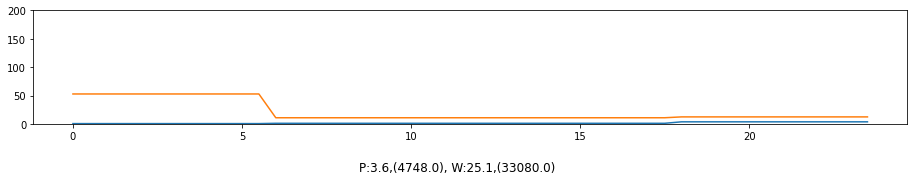

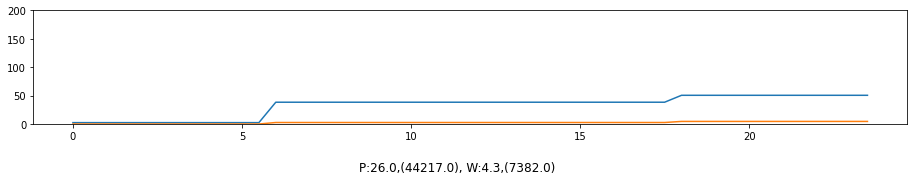

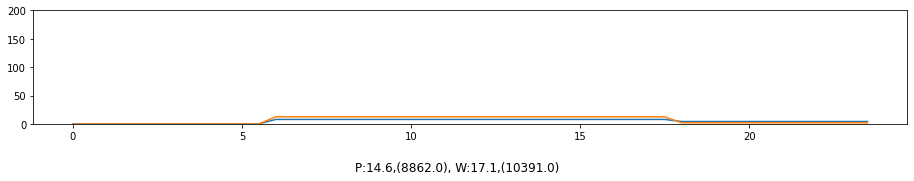

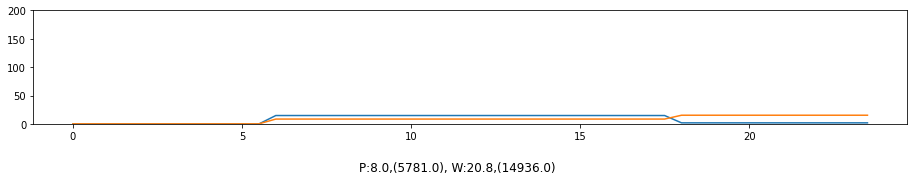

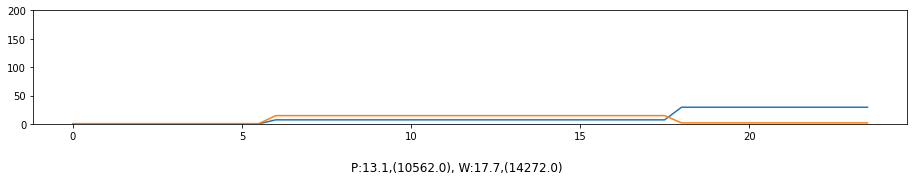

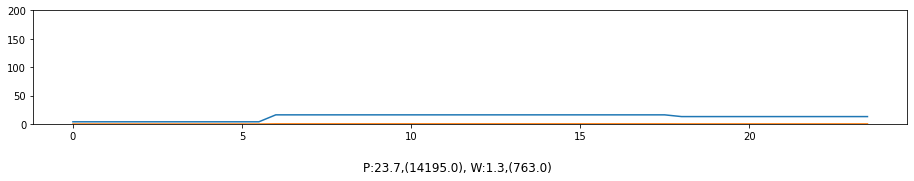

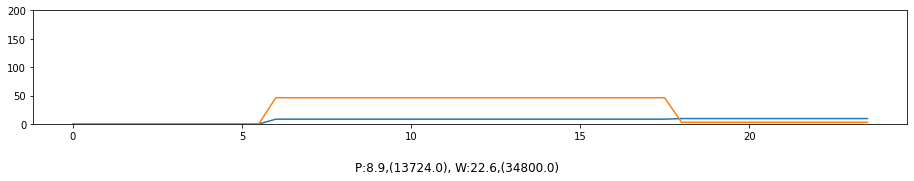

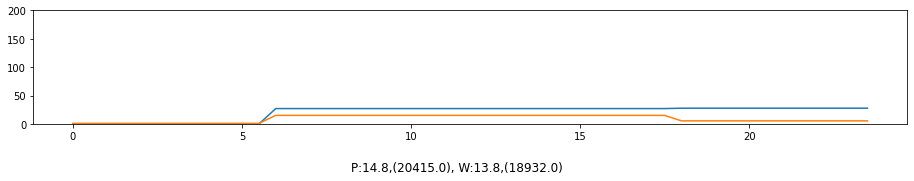

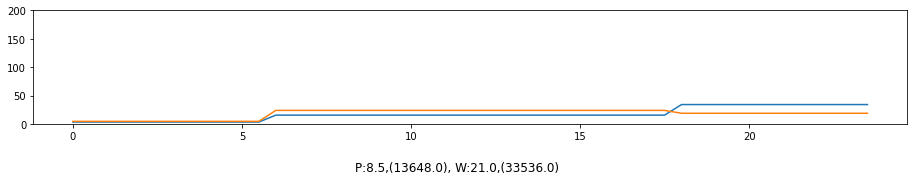

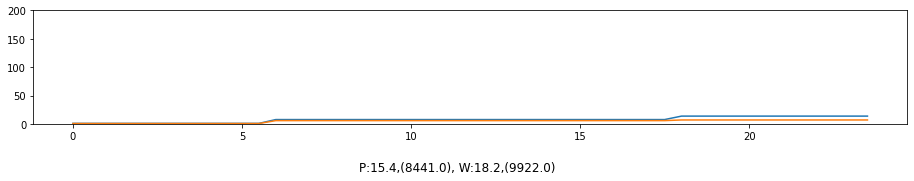

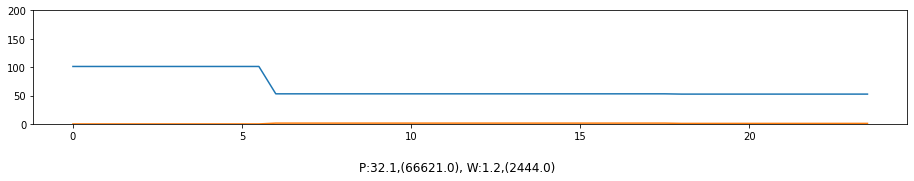

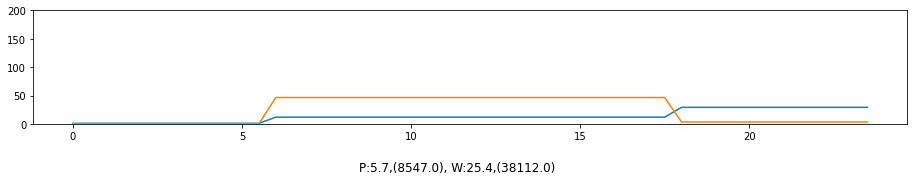

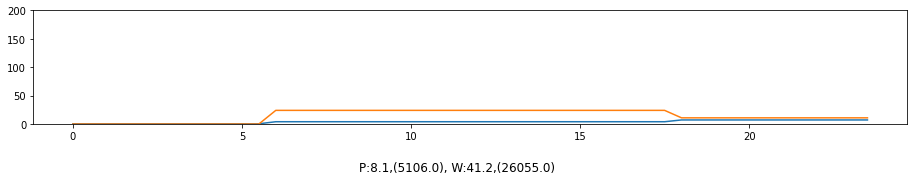

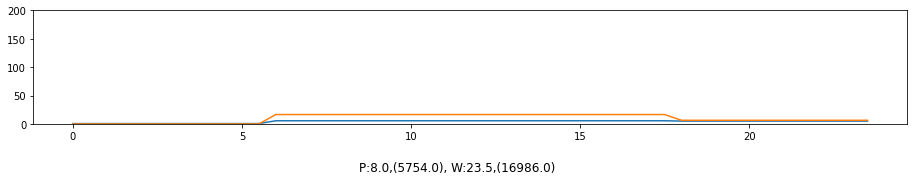

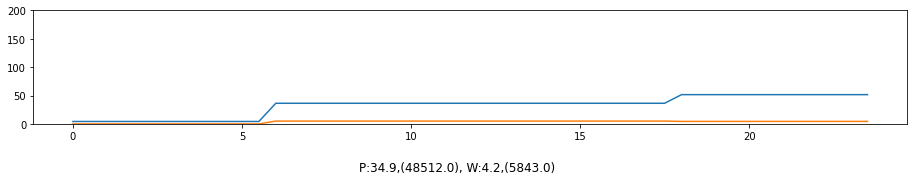

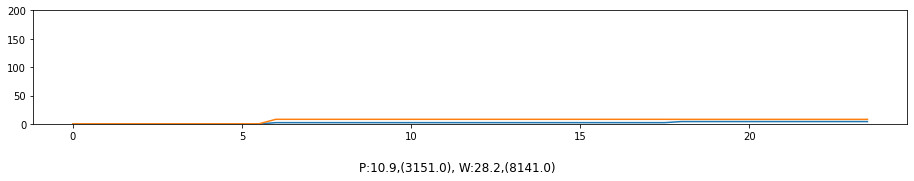

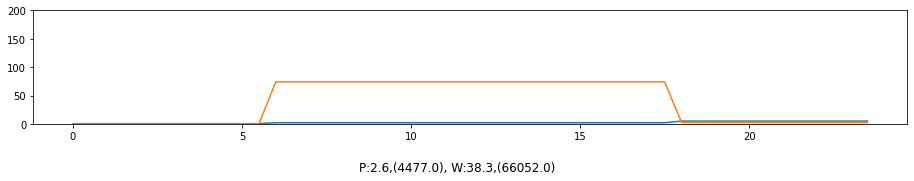

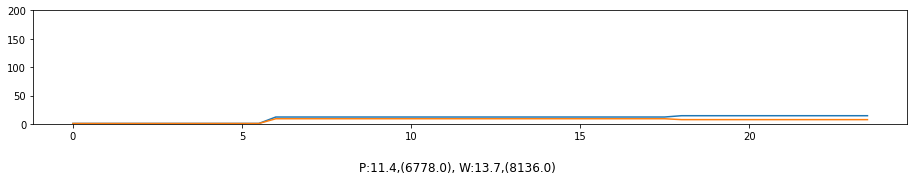

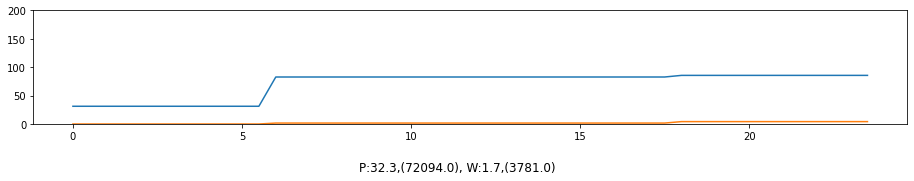

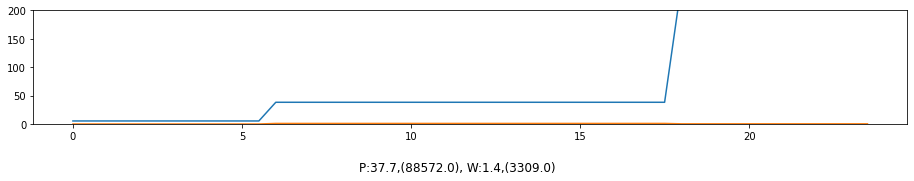

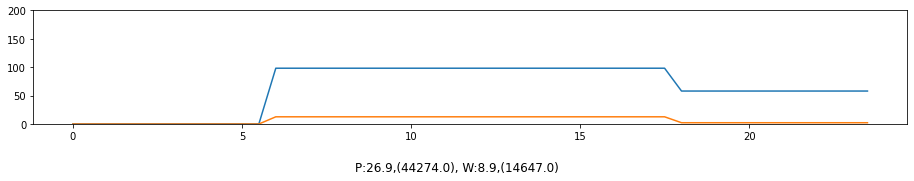

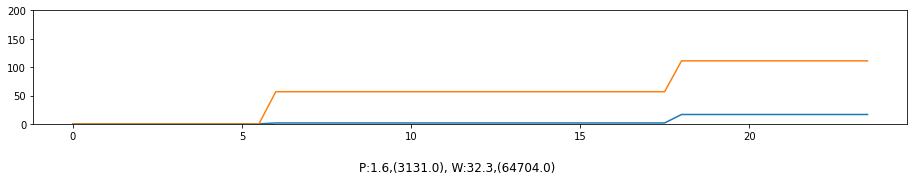

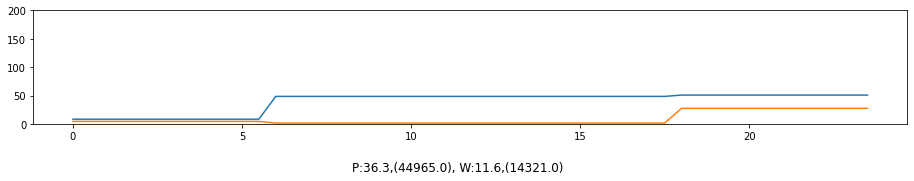

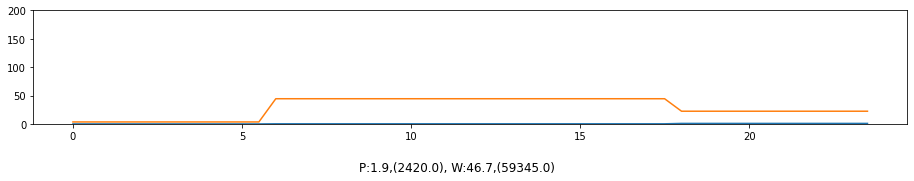

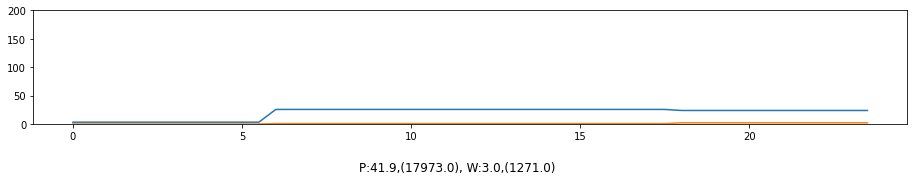

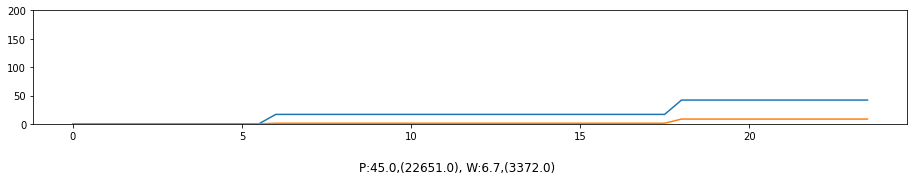

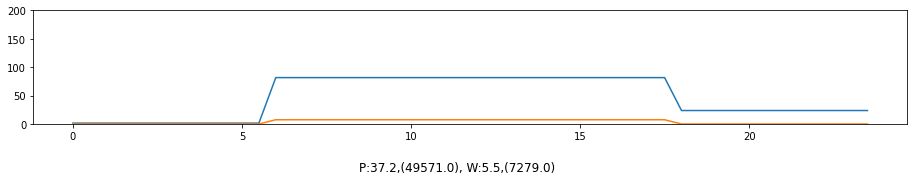

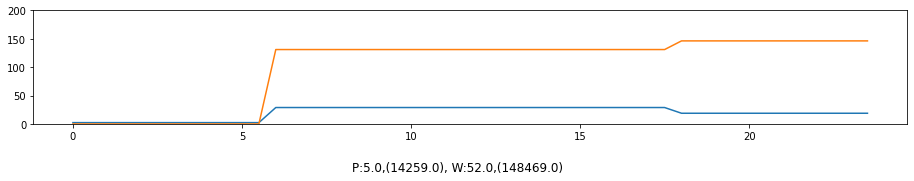

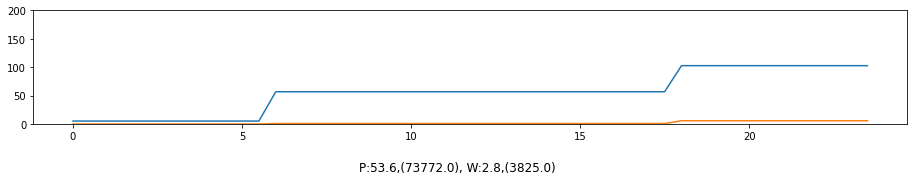

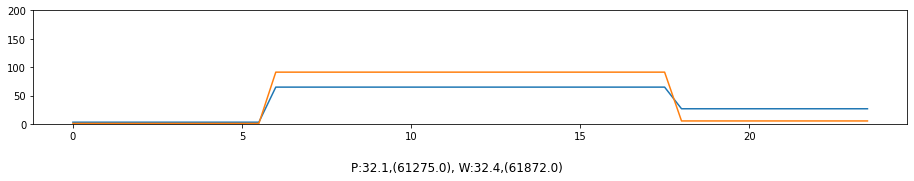

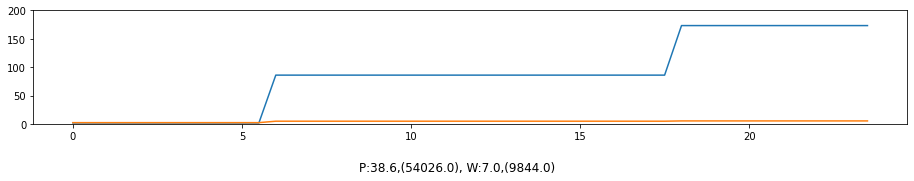

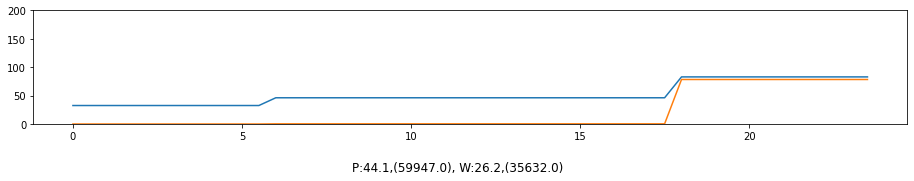

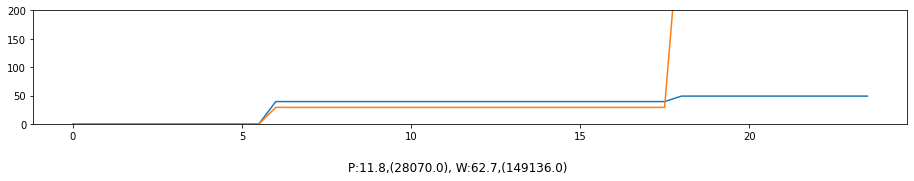

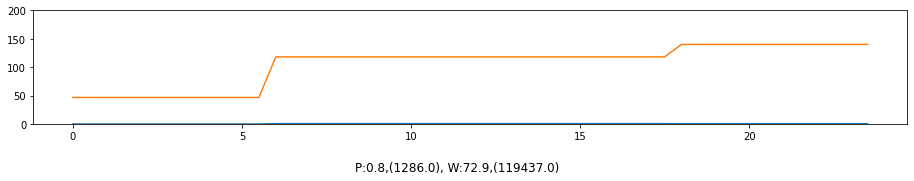

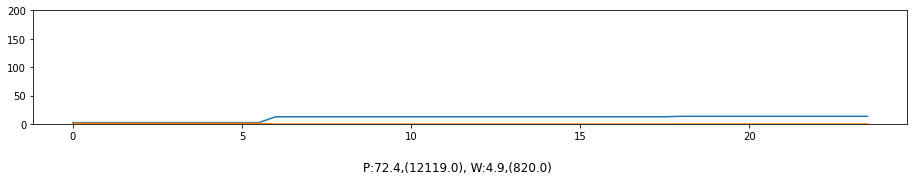

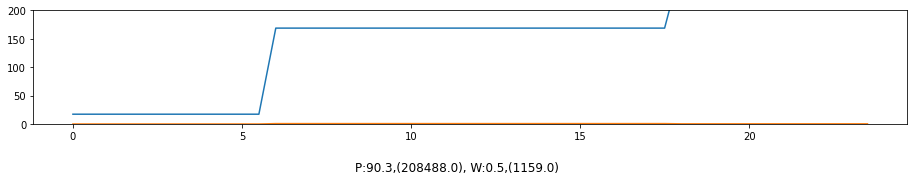

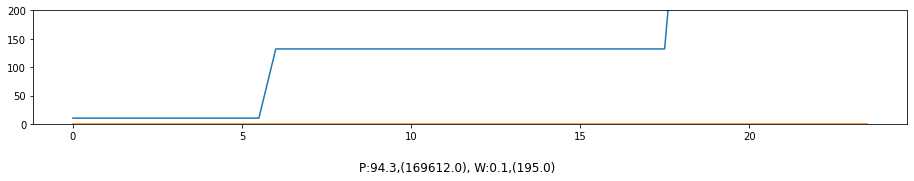

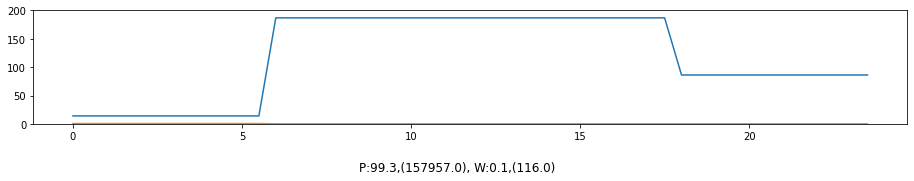

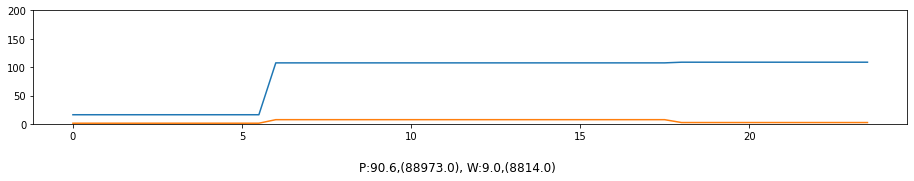

In [127]:
nrows = len(users)
for idx in range(nrows):
    user = users[idx]
    min_user_p = min_count.loc[user].loc['p']
    max_user_p = max_count.loc[user].loc['p']
    
    min_user_w = min_count.loc[user].loc['w']
    max_user_w = max_count.loc[user].loc['w']
    
    diff_step_p = diff_step.loc[user].loc['p']
    diff_step_w = diff_step.loc[user].loc['w']
    
    fig, ax = plt.subplots(1, 1, figsize = (6.4*2, 2.5))
    
    diff_step_p[:12] = diff_step_p[:12].mean()
    diff_step_w[:12] = diff_step_w[:12].mean()
    
    diff_step_p[12:36] = diff_step_p[12:36].mean()
    diff_step_w[12:36] = diff_step_w[12:36].mean()
    
    diff_step_p[36:48] = diff_step_p[36:48].mean()
    diff_step_w[36:48] = diff_step_w[36:48].mean()
    
    ax.plot(np.arange(48), diff_step_p, label="phone", color = color['phone'])
    ax.plot(np.arange(48), diff_step_w, label="watch", color = color['watch'])

    # ax.set_ylim([0,1])
    ax.set_ylim([0,200])
    ax.set_xticks(np.arange(0,48,10))
    ax.set_xticklabels(np.arange(0,24,5))
    fig.supxlabel(f'''P:{round(ratio.loc[user]['p']*100,1)},({cnt.loc[user]['p']}), W:{round(ratio.loc[user]['w']*100,1)},({cnt.loc[user]['w']})''')
    plt.tight_layout()
    plt.show()
    plt.close()

In [169]:
nrows = len(users)
count_list = np.zeros(4)
user_groups = [[],[],[],[]]
for user in users:
    min_user_p = min_count.loc[user].loc['p']
    max_user_p = max_count.loc[user].loc['p']
    
    min_user_w = min_count.loc[user].loc['w']
    max_user_w = max_count.loc[user].loc['w']
    
    diff_step_p = diff_step.loc[user].loc['p']
    diff_step_w = diff_step.loc[user].loc['w']
        
    slice_ = range(12, 36)
    day_p = min_user_p[slice_].mean()
    day_w = min_user_w[slice_].mean()
    
    slice_ = range(36, 48)
    night_p = min_user_p[slice_].mean()
    night_w = min_user_w[slice_].mean()
    
    idx = 0
    if day_p> day_w:
        idx +=1
    if night_p > night_w:
        idx += 2
    count_list[idx] += 1
    user_groups[idx].append(user)
    
print("none phone", "day phone", "night phone", "all phone", sep =" | ")
print(count_list)

none phone | day phone | night phone | all phone
[30.  3. 12. 39.]


/home/highjun/.local/lib/python3.8/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


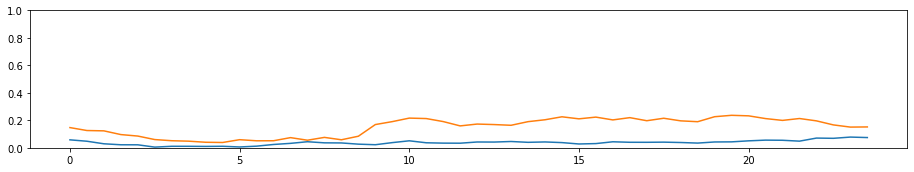

/home/highjun/.local/lib/python3.8/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


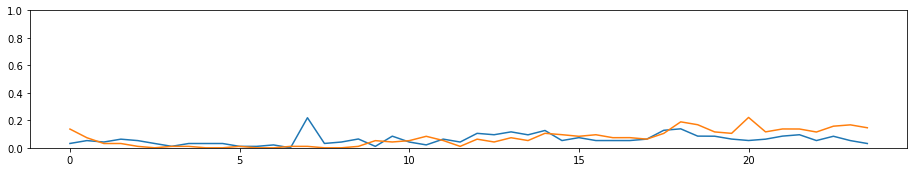

/home/highjun/.local/lib/python3.8/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


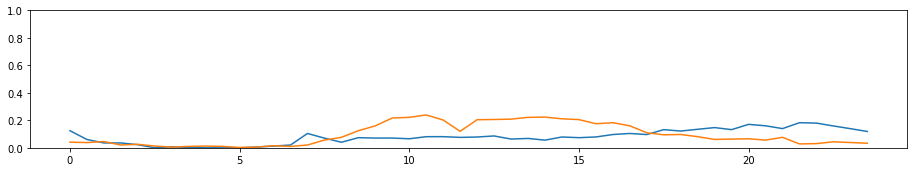

/home/highjun/.local/lib/python3.8/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


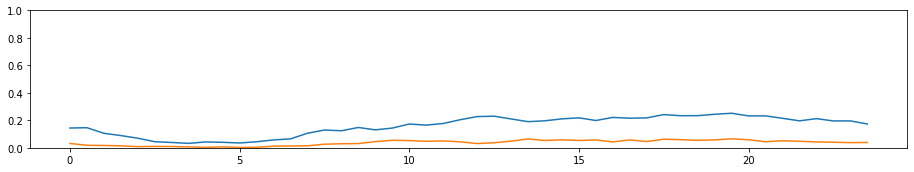

In [170]:
for user_group in user_groups:
    step = min_count.query("users in @user_group")
    step = step.reset_index()
    step = step.groupby(["level_1"]).mean()
    
    fig, ax = plt.subplots(1, 1, figsize = (6.4*2, 2.5))
    
    
    ax.plot(np.arange(48), step.loc['p'], label="phone", color = color['phone'])
    ax.plot(np.arange(48), step.loc['w'], label="watch", color = color['watch'])

    ax.set_ylim([0,1])
    # ax.set_ylim([0,100])
    ax.set_xticks(np.arange(0,48,10))
    ax.set_xticklabels(np.arange(0,24,5))
    plt.tight_layout()
    plt.show()
    plt.close()

In [3]:
bout = load_bout()
users = getSortedUser(bout)
n_date = bout.groupby(["users","date"]).agg(n_date = ("step","count"))
n_date = n_date.reset_index().groupby(["users"]).agg(num=("date","count"))
ratio = getBoutRatio(bout.query("weekday<5"))
cnt = getBoutRatio(bout.query("weekday< 5"), normalize = False)